In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [62]:
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import cv2
import tqdm
import ipywidgets as widgets
from PIL import Image
from keras.layers import MaxPooling2D , Conv2D , Dense , Flatten , Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import os


In [63]:
X_train = []
Y_train = []
image_size = 150
labels = ["glioma","meningioma","notumor","pituitary"]
for i in labels:
    folderpath = os.path.join("/kaggle/input/brain-tumor-mri-dataset/Training",i)
    for j in os.listdir(folderpath):
        img = cv2.imread(os.path.join(folderpath ,j))
        img = cv2.resize(img,(image_size , image_size))
        X_train.append(img)
        Y_train.append(i)
    
    
    
for i in labels:
    folderpath = os.path.join("/kaggle/input/brain-tumor-mri-dataset/Testing",i)
    for j in os.listdir(folderpath):
        img = cv2.imread(os.path.join(folderpath,j))
        img = cv2.resize(img,(image_size , image_size))
        X_train.append(img)
        Y_train.append(i)
        
    

In [64]:
X_train  = np.array(X_train)
Y_train = np.array(Y_train)

In [65]:
X_train,Y_train = shuffle(X_train , Y_train, random_state = 101)

In [66]:
X_train.shape

(7023, 150, 150, 3)

In [67]:
Y_train.shape

(7023,)

In [68]:
X_train , X_test , y_train , y_test = train_test_split(X_train , Y_train , test_size = 0.10 , random_state = 101)

In [69]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)
    
    

    
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)
    

In [84]:
model = Sequential()
model.add(Conv2D(150 , (3,3), activation = "relu" , input_shape = (150,150,3)))
model.add(Conv2D(64 , (3,3) , activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64 , (3,3) , activation = "relu"))
model.add(Conv2D(64 , (3,3) , activation = "relu"))
model.add(Dropout(0.30))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.30))
model.add(Conv2D(128, (3,3),activation = "relu"))
model.add(Conv2D(128, (3,3) , activation = "relu"))
model.add(Conv2D(128 , (3,3) , activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128 , (3,3) , activation = "relu"))
model.add(Conv2D(256 , (3,3) , activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512 , activation = 'relu'))
model.add(Dense(512 , activation = 'relu'))
model.add(Dense(256 , activation = 'relu'))
model.add(Dense(4 , activation = "softmax"))


In [85]:
model.compile(loss = "categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [86]:
history = model.fit(X_train , y_train ,epochs = 20 , validation_split = 0.10)

Epoch 1/20


2024-03-07 19:08:09.383069: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,150,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,150,148,148]{3,2,1,0}, f32[32,64,146,146]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-07 19:08:10.650562: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2.267612715s
Trying algorithm eng0{} for conv (f32[64,150,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,150,148,148]{3,2,1,0}, f32[32,64,146,146]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-07 19:08:12.905595: E external/local_xla/xla/servic

177/178 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3545 - loss: 10.0528

2024-03-07 19:08:42.353445: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,150,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,150,148,148]{3,2,1,0}, f32[24,64,146,146]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-07 19:08:43.054822: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.70156281s
Trying algorithm eng0{} for conv (f32[64,150,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,150,148,148]{3,2,1,0}, f32[24,64,146,146]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-07 19:08:45.003057: E external/local_xla/xla/service

178/178 ━━━━━━━━━━━━━━━━━━━━ 58s 188ms/step - accuracy: 0.3558 - loss: 10.1565 - val_accuracy: 0.2168 - val_loss: 63.8823
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.2682 - loss: 88.8718 - val_accuracy: 0.2848 - val_loss: 88135.9609
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.2913 - loss: 12736.5264 - val_accuracy: 0.2848 - val_loss: 433447.1875
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.2827 - loss: 100922.5312 - val_accuracy: 0.2769 - val_loss: 34010344.0000
Epoch 5/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.2779 - loss: 17.9160 - val_accuracy: 0.2864 - val_loss: 1.3752
Epoch 6/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.2876 - loss: 1.3829 - val_accuracy: 0.2864 - val_loss: 1.3748
Epoch 7/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.2825 - loss: 2.6493 - val_accuracy: 0.2832 - val_loss: 4423.7876
Epoch 8/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.

In [87]:
model.save("braintumor.h5")
import matplotlib.pyplot as plt
import seaborn as sn

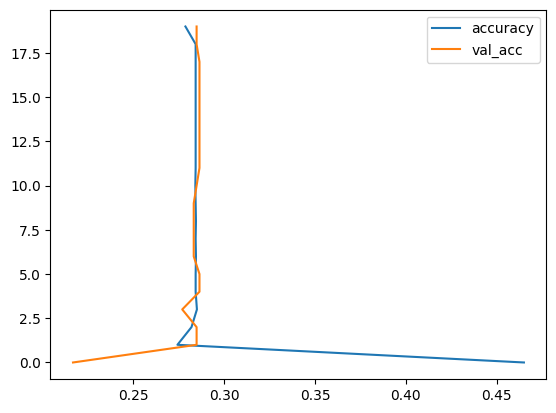

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(acc , epochs , label = "accuracy")
plt.plot(val_acc , epochs , label = "val_acc")
plt.legend()
plt.show()

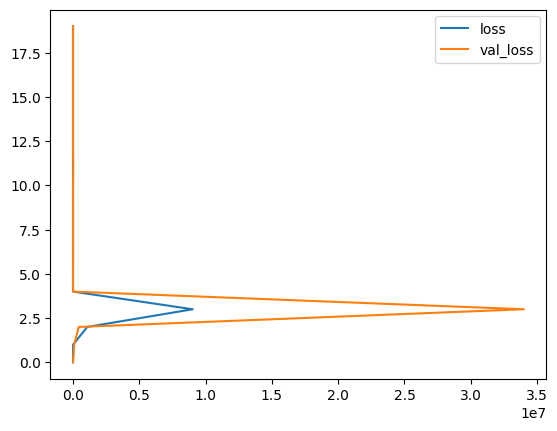

In [89]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(loss ,epochs , label = "loss")
plt.plot(val_loss , epochs , label = "val_loss" )
plt.legend()
plt.show()

In [90]:
img = cv2.imread("/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-pi_0012.jpg")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [91]:
from keras.preprocessing import image

In [92]:
img = image.load_img("/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-pi_0012.jpg")

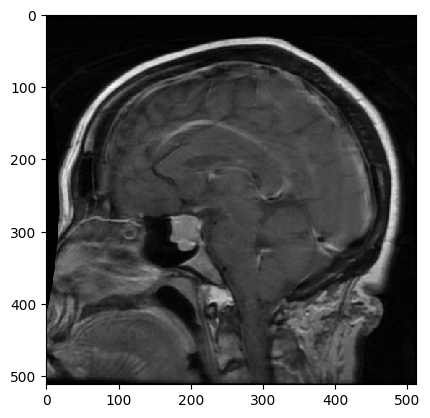

In [93]:
img1 = image.load_img("/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-piTr_0005.jpg")
plt.imshow(img1 , interpolation = "nearest")
plt.show()

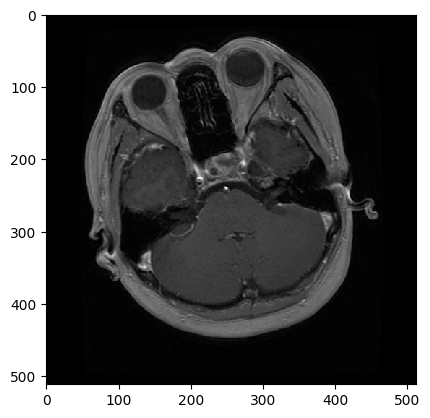

In [94]:
plt.imshow(img , interpolation = "nearest")
plt.show()

In [95]:
img1 = cv2.imread("/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-piTr_0005.jpg")
img1 = cv2.resize(img1,(150,150))
img1_array = np.array(img1)